## **pyTopoComplexity**
### **Landform Smoothing Simulation via Nonlinear Hillslope Diffusion Processes**

This notebook demonstrates the use of **Landlab** (Hobley et al., 2017), an open-source Python framework for simulating landscape evolution, to model topographic smoothing driven by near-surface soil disturbance and downslope soil creep processes. Specifically, it employs the `TaylorNonLinearDiffuser` component from **Landlab**, which is also a key element in the **terrainBento** package (Barnhart et al., 2019), to simulate topographic smoothing over time through nonlinear hillslope diffusion processes (Roering et al., 1999).​

The example GeoTIFF rasters include lidar Digital Elevation Model (DEM) files that cover the area affected by a deep-seated landslide that occurred in 2014 in the Oso area of the North Fork Stillaguamish River valley, Washington State, USA (Washington Geological Survey, 2023). These example DEMs vary in grid spacing (i.e., grid size), coordinate reference system (CRS), and unit of grid value (elevation, Z). One of the goals of this notebook is to enable reproduction of the simulation results presented in Booth et al. (2017).

Archives of codes and example DEM data:
* Zenodo. https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComplexity

<hr>
For more about **Landlab** installation and tutorials, visit: <a href="https://landlab.readthedocs.io/en/latest/index.html">https://landlab.readthedocs.io/en/latest/index.html</a>
<hr>

### **Theories**

##### **Nonlinear Hillslope Diffusion Model**

Inspired by Ganti et al. (2012), the model employs a slope-dependent flux law with a Taylor expansion to approximate the Andrews-Bucknam transport function for the nonlinear hillslope diffusion process (Roering et al., 1999). The main simulation apply the nonlinear diffusion model iteratively to predict the change of surface elevation $z$ over time $t$ (i.e., erosion rate). It defines $\mathbf{q}_s$ as a 2D vector representing the rate of soil volume flow per unit slope width (with units of length squared per time, assuming that $\mathbf{q}_s$ represents a ‘bulk’ flux, including pore spaces between soil grains). In the absence of any ‘local’ input sources (such as weathering of rock) or output (such as removal by wash erosion), conservation of mass dictates that

$$\frac{\partial z}{\partial t} = -\nabla \cdot \mathbf{q}_s$$

The soil flux ($\mathbf{q}_s$) can be represented as:

$$\mathbf{q}_s = D \mathbf{S} \left[1 + \sum_{i=1}^N \left( \frac{S}{S_c}\right)^{2i}\right]$$

, where $\mathbf{S} = -\nabla z$ is the downslope topographic gradient, and $S$ is its magnitude. Parameter $D$ is a diffusion-like transport coefficient with dimensions of length squared per time. $S_c$ is the critical slope representing the asymptotic maximum hillslope gradient. $N$ is the number of terms in the Taylor expansion, and the $i$ is the number of additional terms desired. If $N=0$, the expression reduces to plain linear diffusion (Culling, 1963).

##### **Stream Power Incision Model**

Inspired by Braun and Willett (2013), the stream power model accounts fluvial channel erosion processes in an actively incising landscape. The model predicts the change of topographic elevation $z$ over time $t$ (i.e., erosion rate) according to the following equation:

$$
\frac{\partial z}{\partial t} = K A^{m} S^{n} - \Omega
\:\:\:\:\:\:\:\:\: \text{when}
\:\:\:\ K A^{m} S^{n} > \Omega
$$

Here, $A$ represents the drainage area, and $S$ denotes the slope of steepest descent ($-{\partial z}/{\partial x}$), where $x$ is the horizontal distance (positive in the downslope direction) and $z$ is the elevation. $K$ is a positive constant representing the erodibility coefficient, which correlates positively with climate wetness or storminess and negatively with rock strength. $m$ and $n$ are positive exponents, typically assumed to have a ratio $m/n \approx 0.5$ (Whipple & Tucker, 1999). $\Omega$ represents the erosion threshold in the stream power equation.

When the stream power does not exceed the erosion threshold ($K A^{m} S^{n} \leq \Omega$), the model considers the erosion rate to be zero (${\partial z}/{\partial t} = 0$). When $\Omega$ is set to zero, the model treats the stream power equation as a purely detachment-limited erosion process (i.e., without substantial fluvial sediment effects). In this case, fluvial erosion acts at every point on the surface, following the conventional stream power law (Howard et al., 1994).
<hr>

### **References**
##### Journal Articles: 
* Barnhart, K., Glade, R., Shobe, C., Tucker, G. (2019). Terrainbento 1.0: a Python package for multi-model analysis in long-term drainage basin evolution. Geoscientific Model Development  12(4), 1267-1297. https://doi.org/10.5194/gmd-12-1267-2019
* Booth, A.M., LaHusen, S.R., Duvall, A.R., Montgomery, D.R., 2017. Holocene history of deep-seated landsliding in the North Fork Stillaguamish River valley from surface roughness analysis, radiocarbon dating, and numerical landscape evolution modeling. Journal of Geophysical Research: Earth Surface 122, 456-472. https://doi.org/10.1002/2016JF003934  
* Braun, J., Willett, S. (2013). A very efficient O(n), implicit and parallel method to solve the stream power equation governing fluvial incision and landscape evolution. Geomorphology 180-181(C), 170-179. https://doi.org/10.1016/j.geomorph.2012.10.008
* Culling, W.E.H., 1963. Soil creep and the development of hillside slopes. The Journal of Geology 71, 127-161. https://doi.org/10.1086/626891.
* Ganti, V., Passalacqua, P., Foufoula-Georgiou, E. (2012). A sub-grid scale closure for nonlinear hillslope sediment transport models. Journal of Geophysical Research: Earth Surface, 117(F2). https://doi.org/10.1029/2011jf002181
* Hobley, D.E.J., Adams, J.M., Nudurupati, S.S., Hutton, E.W.H., Gasparini, N.M., Istanbulluoglu, E., Tucker, G.E., 2017. Creative computing with Landlab: an open-source toolkit for building, coupling, and exploring two-dimensional numerical models of Earth-surface dynamics. Earth Surf. Dynam. 5, 21-46. https://doi.org/10.5194/esurf-5-21-2017
* Howard, A.D. (1994) A detachment-limited model of drainage basin evolution. Water Resources Research 30, 2261-2285. https://doi.org/10.1029/94WR00757.
* Roering, J. J., Kirchner, J. W., & Dietrich, W. E. (1999). Evidence for nonlinear, diffusive sediment transport on hillslopes and implications for landscape morphology. Water Resources Research, 35(3), 853-870. https://doi.org/10.1029/1998wr900090
* Whipple, K. X., & Tucker, G. E. (1999) Dynamics of the stream-power river incision model: Implications for height limits of mountain ranges, landscape response timescales, and research needs. Journal of Geophysical Research, 104(B8), 17661-17694. https://doi.org/10.1029/1999JB900120

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' project [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]

<hr>

#### 0. Import packages

In [38]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import glob
import imageio.v2 as imageio
import re
from IPython.display import display, Image
from osgeo import gdal
from landlab import imshowhs_grid
from landlab.components import TaylorNonLinearDiffuser, FlowAccumulator, StreamPowerEroder
from landlab.io import read_esri_ascii, write_esri_ascii

#### 2. Raster Format Conversion Functions
These utility functions handle file format conversions, because **Landlab** componentsare designed for processing raster files in ESRI ASCII format rather than GeoTIFFs.
* `tiff_to_asc`: Converts GeoTIFF to ESRI ASCII format.
* `asc_to_tiff`: Converts ESRI ASCII back to GeoTIFF, preserving metadata.

***Notes***: The input DEM layout must not have nodata or extreme values to prevent Landlab component encountering errors due to infinite slope ($S$) and sediment flux ($\mathbf{q}_s$).

In [39]:
def tiff_to_asc(in_path, out_path):
    with rasterio.open(in_path) as src:
        XYZunit = src.crs.linear_units   #assuming the unit of XYZ direction are the same
        mean_res = np.mean(src.res)
    
    gdal.UseExceptions()  # Enable exceptions for GDAL
    gdal.Translate(out_path, in_path, format='AAIGrid', xRes=mean_res, yRes=mean_res)
 
    print(f"The input GeoTIFF is temporarily converted to '{os.path.basename(out_path)}' with grid spacing {mean_res} ({XYZunit})")
    return mean_res, XYZunit
    
def asc_to_tiff(asc_path, tiff_path, meta):
    data = np.loadtxt(asc_path, skiprows=6)
    meta.update(dtype=rasterio.float32, count=1, compress='deflate')

    with rasterio.open(tiff_path, 'w', **meta) as dst:
        dst.write(data.astype(rasterio.float32), 1)
    print(f"'{os.path.basename(tiff_path)}' is saved")

#### 5. Simulation Functions
The `init_landlab` function initializes the landlab components for simulation:
1. Reads the ASCII file into a **Landlab** grid.
2. Sets boundary conditions.
3. Converts the diffusion coefficient to appropriate units.
4. Creates and returns the output from `TaylorNonLinearDiffuser`,  `StreamPowerEroder`, `FlowAccumulator` components.

The `run_simulation` function is the main function that allow user to excute the simulation:
1. Converts input TIFF to ASCII.
2. Initializes the simulation.
3. Runs the diffusion model for the specified number of time steps.
4. For each step, it updates the topography, saves results (Geotiff and PNG), and converts files.
5. Cleans up temporary files (ASCII and PRJ files) at the end.

In [40]:
def init_landlab(asc_file, XYZunit=None, Hdiffusion=True, SPincision=True, D=None, Sc=None, K=None, m=0.5, n=1.0, omega=0, U=0):
    # Define unit conversion factors
    ft2mUS = 1200/3937   #US survey foot to meter conversion factor 
    ft2mInt = 0.3048     #International foot to meter conversion factor 

    # Read the ASCII file into a Landlab grid
    grid, _ = read_esri_ascii(asc_file, name='topographic__elevation') #the xy grid spacing must be equal
    # Set boundary conditions: open boundaries allow sediment to move in/out of the study area
    grid.set_closed_boundaries_at_grid_edges(False, False, False, False)  #(right, top, left, bottom) bounaries

    # Check the unit of XYZ and make unit conversion of D and K when needed
    if XYZunit is None:
        print("The function assumes the input XYZ units are in meters.")
    elif XYZunit is not None:
        if any(unit in XYZunit.lower() for unit in ["metre".lower(), "meter".lower()]):
            print("Input XYZ units are in meters. No unit conversion is made")
        elif any(unit in XYZunit.lower() for unit in ["foot".lower(), "feet".lower(), "ft".lower()]):  
            if any(unit in XYZunit.lower() for unit in ["US".lower(), "United States".lower()]):
                print("Input XYZ units: US survey feet. Unit conversion to meters is applied during the simulation.")
                if D is not None:
                    D = D / (ft2mInt ** 2)    # Convert D from m^2/yr to ft^2/yr
                if K is not None:
                    K = K / (ft2mInt ** 0.5)  # Convert K from m^0.5/yr to ft^0.5/yr
            else:
                print("Input XYZ units: international feet. Unit conversion to meters is applied during the simulation.")
                if D is not None:
                    D = D / (ft2mInt ** 2)    # Convert D from m^2/yr to ft^2/yr
                if K is not None:
                    K = K / (ft2mInt ** 0.5)  # Convert K from m^0.5/yr to ft^0.5/yr
        else:
            message = (
            "WARNING: The code execution is stopped. "
            "The input XYZ units must be in feet or meters."
            )
            raise RuntimeError(message)
        
    # Initiate Landlab components 
    TNLD = None
    SP = None
    fa = None

    if Hdiffusion:
        if D is None or Sc is None:
            raise ValueError("D and Sc must be provided when Hdiffusion is True")
        # For nonlinear hillslope diffusion
        TNLD = TaylorNonLinearDiffuser(grid, linear_diffusivity=D, slope_crit=Sc, dynamic_dt=True, nterms=2, if_unstable = "pass")
    
    if SPincision:
        if K is None:
            raise ValueError("K must be provided when SPincision is True")
        # For flow routing
        fa = FlowAccumulator(grid, flow_director='D8')
        # For stream power erosion
        SP = StreamPowerEroder(grid, K_sp=K, m_sp=m, n_sp=n, threshold_sp=omega)
    
    return grid, TNLD, SP, fa, U

def run_simulation(in_tiff, dt, end_time, U=0, Hdiffusion=None, D=None, Sc=None, SPincision=None, K=None, m=0.5, n=1.0, omega=0, savetiff=True, savepng=True, savegif=True):
    if Hdiffusion is None or SPincision is None:
        raise ValueError("Both Hdiffusion and SPincision must be explicitly set to True or False")
    if not (savetiff or savepng):
        raise ValueError("At least one of savetiff or savepng must be True")
    if savegif and not savepng:
        raise ValueError("When savegif is True, savepng must also be True")
    if not (Hdiffusion or SPincision):
        raise ValueError("At least one of Hdiffusion or SPincision must be True")

    BASE_DIR = os.path.dirname(in_tiff)
    basefilename = os.path.splitext(os.path.basename(in_tiff))[0]
    in_asc = os.path.join(BASE_DIR, f"{basefilename}.asc")
    mean_res, XYZunit = tiff_to_asc(in_tiff, in_asc) #convert input GeoTIFF to ASCII, and determine the XYZ units

    grid, tnld, sp, fa, U = init_landlab(in_asc, XYZunit, Hdiffusion, SPincision, D, Sc, K, m, n, omega, U)
    z = grid.at_node['topographic__elevation']

    with rasterio.open(in_tiff) as src:
        meta = src.meta.copy()

    # Setup output directories
    if Hdiffusion and SPincision:
        subfolder = 'simulation_HDSP'
    elif Hdiffusion:
        subfolder = 'simulation_HD'
    elif SPincision:
        subfolder = 'simulation_SP'
    OUT_DIR = os.path.join(BASE_DIR, subfolder)
    os.makedirs(OUT_DIR, exist_ok=True)
    if savepng:
        OUT_DIRpng = os.path.join(OUT_DIR, 'PNGs')
        os.makedirs(OUT_DIRpng, exist_ok=True)
    if savetiff:
        OUT_DIRtiff = os.path.join(OUT_DIR, 'GeoTIFFs')
        os.makedirs(OUT_DIRtiff, exist_ok=True)
    if savegif:
        OUT_DIRgif = os.path.join(OUT_DIR, 'GIFs')
        os.makedirs(OUT_DIRgif, exist_ok=True)

    png_files = []
    num_steps = int(end_time / dt)
    for i in range(num_steps + 1):             # +1 to include initial state
        time = i * dt
        if i > 0:
            small_dt = max(dt / 10, 1)         # Ensure the small timestep is at least 1 year
            for _ in range(int(dt / small_dt)):
                if U != 0:
                    z[grid.core_nodes] += U * small_dt
                if SPincision:
                    fa.run_one_step()              # Update flow routing
                    sp.run_one_step(small_dt)      # Run stream power erosion
                if Hdiffusion:
                    tnld.run_one_step(small_dt)    # Run nonlinear hillslope diffusion

        if savepng or savetiff:
            plt.figure(figsize=(6, 5.25))
            imshowhs_grid(grid, z, plot_type="Hillshade")
            title = f"{basefilename} Time: {time} years (U = {U} m/yr)\n"
            if Hdiffusion:
                title += f"Nonlinear HillslopeDiffusion (D = {D} m$^{{2}}$/yr)"
            if Hdiffusion and SPincision:
                title += f"\n + "
            if SPincision:
                title += f"Stream Power Incision (K = {K} m$^{{{1-m}}}$/yr)"
            plt.title(title, fontsize='small', fontweight="bold")
            plt.xticks(fontsize='small')
            plt.yticks(fontsize='small')
            if XYZunit is not None:
                plt.xlabel(f'X-axis grids \n(grid size ≈ {round(mean_res, 4)} [{XYZunit}])', fontsize='small')
                plt.ylabel(f'Y-axis grids \n(grid size ≈ {round(mean_res, 4)} [{XYZunit}])', fontsize='small')
            else:
                print("The function assumes the input XYZ units are in meters.")
                plt.xlabel(f'X-axis grids \n(grid size ≈ {1.0} [meters])', fontsize = 'small')
                plt.ylabel(f'Y-axis grids \n(grid size ≈ {1.0} [meters])', fontsize = 'small') 
            plt.tight_layout()
            
            # Add uplift rate text at the lower left
            plt.text(0.01, 0.01, f'U = {U:.2e} m/yr', transform=plt.gca().transAxes, fontsize='x-small', verticalalignment='bottom')
            
            if savepng:
                png_path = os.path.join(OUT_DIRpng, f"{basefilename}_{time}yrs.png")
                plt.savefig(png_path, dpi=150)
                png_files.append(png_path)
                print(f"'{os.path.basename(png_path)}' is saved")
            
            plt.close()

            if savetiff:
                asc_path = os.path.join(OUT_DIRtiff, f"{basefilename}_{time}yrs.asc")
                write_esri_ascii(asc_path, grid, names=['topographic__elevation'], clobber=True)
                
                tiff_path = os.path.join(OUT_DIRtiff, f"{basefilename}_{time}yrs.tif")
                asc_to_tiff(asc_path, tiff_path, meta)
                
                os.remove(asc_path)

    if savegif and png_files:
        # Find all PNG files for the simulation
        pattern = f"{basefilename}_*.png"
        png_files = glob.glob(os.path.join(OUT_DIRpng, pattern))
        
        # Sort files based on the year in the filename
        png_files.sort(key=lambda x: int(re.search(r'_(\d+)yrs\.png$', x).group(1)))
        
        # Read all images
        images = [imageio.imread(f) for f in png_files]
        
        # Save the gif
        output_file = os.path.join(OUT_DIRgif, f'{basefilename}_0-{end_time}yrs_animation.gif')
        imageio.mimsave(output_file, images, 'GIF', duration=0.5, loop=2)
        
        print(f"{os.path.basename(output_file)} is saved")
        
        # Display the GIF
        display(Image(filename=output_file))

    in_prj = in_asc.replace('.asc', '.prj')
    in_aux = in_asc.replace('.asc', '.asc.aux.xml')
    os.remove(in_asc)
    os.remove(in_prj)
    os.remove(in_aux)
    print("Simulation completed. Temporary ASCII & PRJ files cleaned up.")

#### 6. Excuting the Simulation
This section sets the simulation parameters and runs the simulation when the script is executed directly. Parameters `Sc`, `D`, `dt`, and `end_time` follow the similar simulation conducted in Booth et al. (2017). Here the critical slope value is set to $S_c = 1.25$ (about $51.34^\circ$), the average slope of the Oso landslide area in the Washington State, USA. The values of the diffusion coefficient $D$ in the cell are adapted from the Figs. 5 & 6 of Booth et al. (2017).

Users can specify the value of `ntems` to determine the number of terms in the Taylor expansion ($N$). The default set two terms in the Taylor expansion (`ntems = 2`) that gives the behavior described in Ganti et al. (2012) as an approximation of the nonlinear diffusion. The code also invokes the `dynamic_dt` option, which allows the component to subdivide each "global" timestep if needed for numerical stability.

This section defines file directories for input files and simulation results.
The default assumes the input and output GeoTIFF rasters will be placed in the same directory - a subfolder named`ExampleDEM`

The input GeoTIFF is temporarily converted to 'Ososlid2014_f_6ftgrid.asc' with grid spacing 6.0 (US survey foot)
Input XYZ units: US survey feet. Unit conversion to meters is applied during the simulation.
'Ososlid2014_f_6ftgrid_0yrs.png' is saved
'Ososlid2014_f_6ftgrid_0yrs.tif' is saved
'Ososlid2014_f_6ftgrid_1000yrs.png' is saved
'Ososlid2014_f_6ftgrid_1000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_2000yrs.png' is saved
'Ososlid2014_f_6ftgrid_2000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_3000yrs.png' is saved
'Ososlid2014_f_6ftgrid_3000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_4000yrs.png' is saved
'Ososlid2014_f_6ftgrid_4000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_5000yrs.png' is saved
'Ososlid2014_f_6ftgrid_5000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_6000yrs.png' is saved
'Ososlid2014_f_6ftgrid_6000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_7000yrs.png' is saved
'Ososlid2014_f_6ftgrid_7000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_8000yrs.png' is saved
'Ososlid2014_f_6ftgrid_8000yrs.tif'

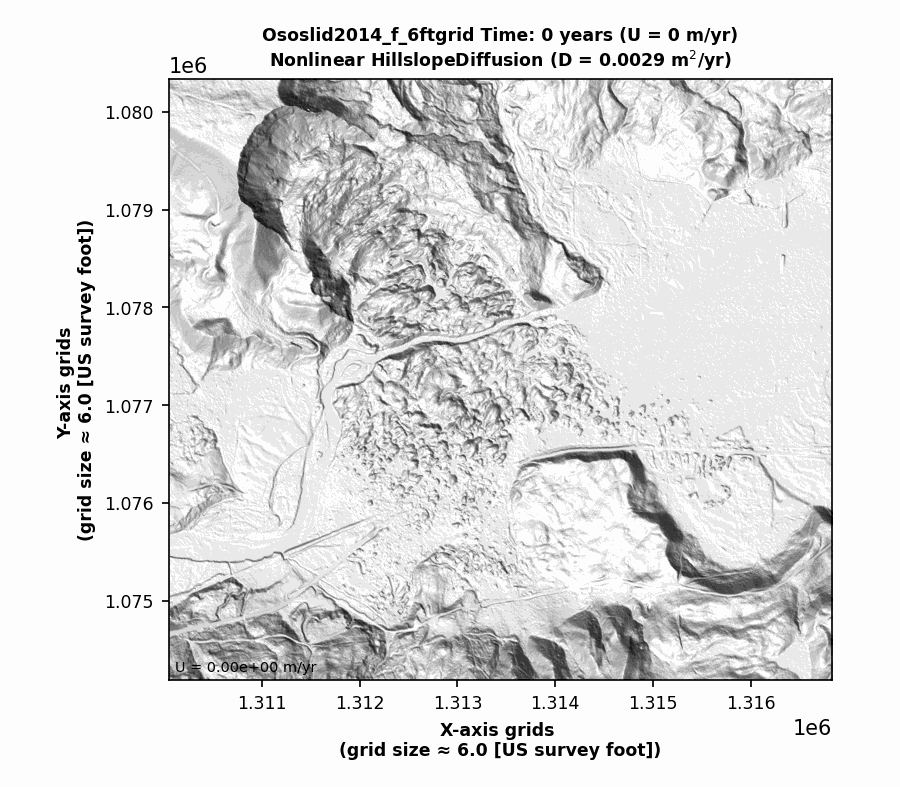

Simulation completed. Temporary ASCII & PRJ files cleaned up.


In [41]:
# Define input file name and directory
BASE_DIR = os.path.join(os.getcwd(), 'ExampleDEM') # input file base directory
INPUT_TIFF = 'Ososlid2014_f_6ftgrid.tif'           # input file name
INPUT_DIR = os.path.join(BASE_DIR, INPUT_TIFF)     # input file directory

# Run the simulation
run_simulation(
    INPUT_DIR,
    dt=1000,           # Time step size (years)
    end_time=15000,    # Final simulation time (years)
    U=0,               # Uplift rate, m/y   
    Hdiffusion=True,   # Enable hillslope diffusion
    D=0.0029,          # Hillslope diffusion coefficient, m^2/y (0.0029 is used in Booth et al., 2017)
    Sc=1.25,           # Critical gradient for hillslope diffusion, m/m (1.25 is used in Booth et al., 2017)
    SPincision=False,  # Enable stream power incision
    savetiff=True,     # Save GeoTIFF files
    savepng=True,      # Save PNG files
    savegif=True       # Save GIF file
)

The input GeoTIFF is temporarily converted to 'Ososlid2014_f_6ftgrid.asc' with grid spacing 6.0 (US survey foot)
Input XYZ units: US survey feet. Unit conversion to meters is applied during the simulation.
'Ososlid2014_f_6ftgrid_0yrs.png' is saved
'Ososlid2014_f_6ftgrid_1000yrs.png' is saved
'Ososlid2014_f_6ftgrid_2000yrs.png' is saved
'Ososlid2014_f_6ftgrid_3000yrs.png' is saved
'Ososlid2014_f_6ftgrid_4000yrs.png' is saved
'Ososlid2014_f_6ftgrid_5000yrs.png' is saved
'Ososlid2014_f_6ftgrid_6000yrs.png' is saved
'Ososlid2014_f_6ftgrid_7000yrs.png' is saved
'Ososlid2014_f_6ftgrid_8000yrs.png' is saved
'Ososlid2014_f_6ftgrid_9000yrs.png' is saved
'Ososlid2014_f_6ftgrid_10000yrs.png' is saved
'Ososlid2014_f_6ftgrid_11000yrs.png' is saved
'Ososlid2014_f_6ftgrid_12000yrs.png' is saved
'Ososlid2014_f_6ftgrid_13000yrs.png' is saved
'Ososlid2014_f_6ftgrid_14000yrs.png' is saved
'Ososlid2014_f_6ftgrid_15000yrs.png' is saved
Ososlid2014_f_6ftgrid_0-15000yrs_animation.gif is saved


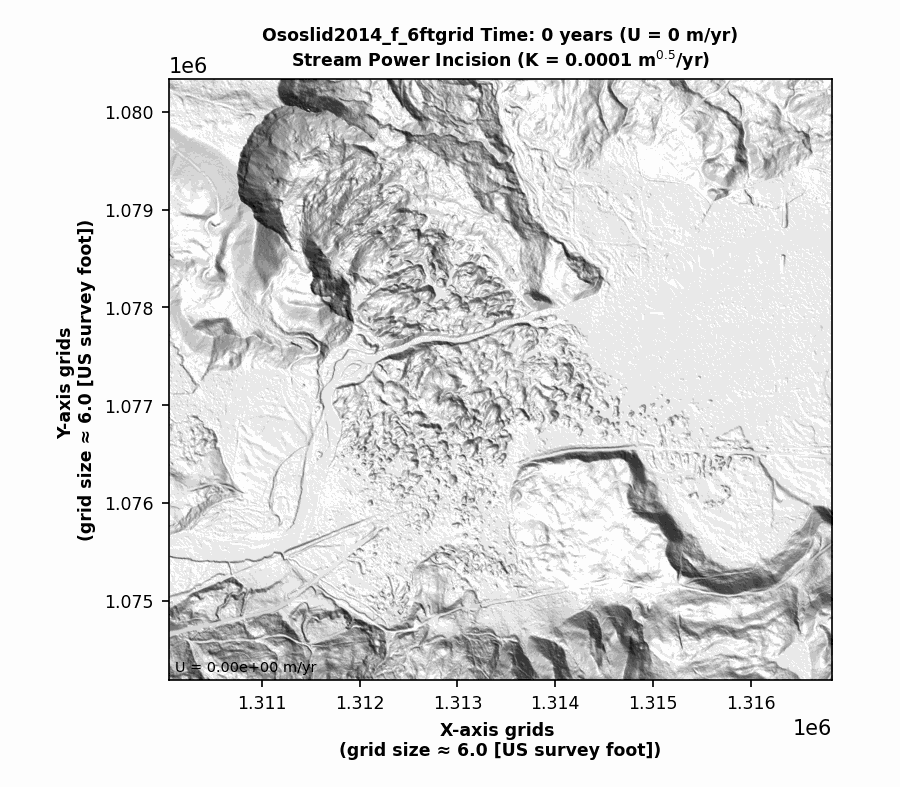

Simulation completed. Temporary ASCII & PRJ files cleaned up.


In [42]:
# Define input file name and directory
BASE_DIR = os.path.join(os.getcwd(), 'ExampleDEM') # input file base directory
INPUT_TIFF = 'Ososlid2014_f_6ftgrid.tif'           # input file name
INPUT_DIR = os.path.join(BASE_DIR, INPUT_TIFF)     # input file directory

# Run the simulation
run_simulation(
    INPUT_DIR,
    dt=1000,           # Time step size (years)
    end_time=15000,    # Final simulation time (years)
    U=0,               # Uplift rate, m/y   
    Hdiffusion=False,  # Enable hillslope diffusion
    SPincision=True,   # Enable stream power incision
    K=0.0001,          # Fluvial erodibility 'K' in the stream power equation, m^(1-m_sp)/y
    m=0.5,             # Exponent of drainage area in the stream power equation
    n=1.0,             # Exponent of slope in the stream power equation
    omega=0,           # Erosion threshold 'Omega' in the stream power equation
    savetiff=False,    # Save GeoTIFF files
    savepng=True,      # Save PNG files
    savegif=True       # Save GIF file
)

The input GeoTIFF is temporarily converted to 'Ososlid2014_f_6ftgrid.asc' with grid spacing 6.0 (US survey foot)
Input XYZ units: US survey feet. Unit conversion to meters is applied during the simulation.
'Ososlid2014_f_6ftgrid_0yrs.png' is saved
'Ososlid2014_f_6ftgrid_0yrs.tif' is saved
'Ososlid2014_f_6ftgrid_1000yrs.png' is saved
'Ososlid2014_f_6ftgrid_1000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_2000yrs.png' is saved
'Ososlid2014_f_6ftgrid_2000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_3000yrs.png' is saved
'Ososlid2014_f_6ftgrid_3000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_4000yrs.png' is saved
'Ososlid2014_f_6ftgrid_4000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_5000yrs.png' is saved
'Ososlid2014_f_6ftgrid_5000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_6000yrs.png' is saved
'Ososlid2014_f_6ftgrid_6000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_7000yrs.png' is saved
'Ososlid2014_f_6ftgrid_7000yrs.tif' is saved
'Ososlid2014_f_6ftgrid_8000yrs.png' is saved
'Ososlid2014_f_6ftgrid_8000yrs.tif'

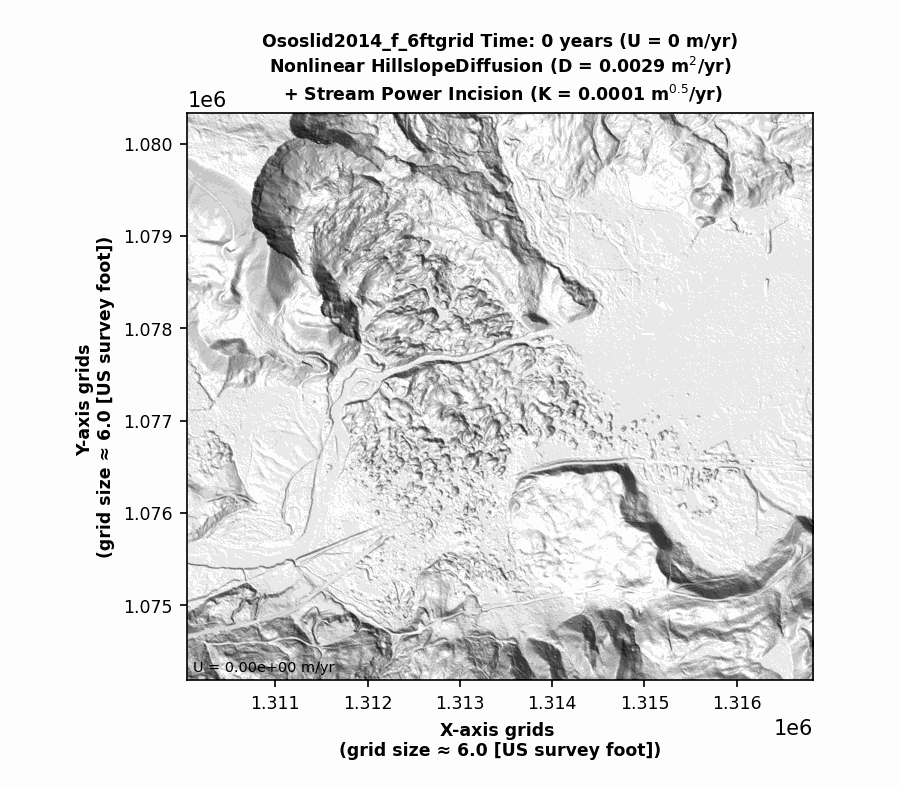

Simulation completed. Temporary ASCII & PRJ files cleaned up.


In [43]:
# Define input file name and directory
BASE_DIR = os.path.join(os.getcwd(), 'ExampleDEM') # input file base directory
INPUT_TIFF = 'Ososlid2014_f_6ftgrid.tif'           # input file name
INPUT_DIR = os.path.join(BASE_DIR, INPUT_TIFF)     # input file directory

# Run the simulation
run_simulation(
    INPUT_DIR,
    dt=1000,           # Time step size (years)
    end_time=15000,    # Final simulation time (years)
    U=0,               # Uplift rate, m/y   
    Hdiffusion=True,   # Enable hillslope diffusion
    D=0.0029,          # Hillslope diffusion coefficient, m^2/y (0.0029 is used in Booth et al., 2017)
    Sc=1.25,           # Critical gradient for hillslope diffusion, m/m (1.25 is used in Booth et al., 2017)
    SPincision=True,   # Enable stream power incision
    K=0.0001,          # Fluvial erodibility 'K' in the stream power equation, m^(1-m_sp)/y
    m=0.5,             # Exponent of drainage area in the stream power equation
    n=1.0,             # Exponent of slope in the stream power equation
    omega=0,           # Erosion threshold 'Omega' in the stream power equation
    savetiff=True,     # Save GeoTIFF files
    savepng=True,      # Save PNG files
    savegif=True       # Save GIF file
)